# Demand Forecasting System for Optimizing Inventory and Supply Chain Efficiency Using Historical Sales Data

# Problem Statement: 

The company has accumulated transactional data from December 2021 to December 2023, consisting of stock code, transaction dates, and quantities sold and etc. The company requires a system to forecast the demand for the next 15 weeks for its top 10 best-selling products.
The goal is to estimate future demand accurately to maintain optimal stock levels, ensuring that the supply chain remains efficient and meets customer demands. The solution should leverage the historical data to predict future demand trends and support inventory 
management decisions.

In [425]:
# import librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl

In [426]:
# import the dataset
df1 = pd.read_csv("D:\model\CustomerDemographics.csv")
df1.head(5)

,Customer ID,Country
0,13085,United Kingdom
1,13078,United Kingdom
2,15362,United Kingdom
3,18102,United Kingdom
4,12682,France


In [427]:
# import the dataset
df2 = pd.read_csv("D:\model\ProductInfo.csv")
df2.head(5)

,StockCode,Description
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER
1,71053,WHITE METAL LANTERN
2,84406B,CREAM CUPID HEARTS COAT HANGER
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE
4,84029E,RED WOOLLY HOTTIE WHITE HEART.


In [428]:
# import the dataset
df3 = pd.read_csv("D:\model\Transactional_data_retail_01.csv")
df4 = pd.read_csv("D:\model\Transactional_data_retail_02.csv")

df = pd.concat([df3,df4], ignore_index=True)
df

,Invoice,StockCode,Quantity,Price,Customer ID,InvoiceDate
0,489434,85048,12,6.95,13085.0,01 December 2021
1,489434,79323P,12,6.75,13085.0,01 December 2021
2,489434,79323W,12,6.75,13085.0,01 December 2021
3,489434,22041,48,2.10,13085.0,01 December 2021
4,489434,21232,24,1.25,13085.0,01 December 2021
...,...,...,...,...,...,...
1067366,581587,22899,6,2.10,12680.0,09-12-2023
1067367,581587,23254,4,4.15,12680.0,09-12-2023
1067368,581587,23255,4,4.15,12680.0,09-12-2023
1067369,581587,22138,3,4.95,12680.0,09-12-2023


In [429]:
# merge the dataset
df = df1.merge(df, on=["Customer ID"],how = 'inner').merge(df2, on=["StockCode"],how="inner")
df.head(5)

,Customer ID,Country,Invoice,StockCode,Quantity,Price,InvoiceDate,Description
0,13085,United Kingdom,489434,85048,12,6.95,01 December 2021,15CM CHRISTMAS GLASS BALL 20 LIGHTS
1,13085,United Kingdom,489434,79323P,12,6.75,01 December 2021,PINK CHERRY LIGHTS
2,13085,United Kingdom,489434,79323P,12,6.75,01 December 2021,"Unsaleable, destroyed."
3,13085,United Kingdom,489434,79323P,12,6.75,01 December 2021,NaN
4,13085,United Kingdom,489434,79323W,12,6.75,01 December 2021,WHITE CHERRY LIGHTS


* "I imported the dataset and thoroughly analyzed the data across all four datasets. After identifying and correcting discrepancies in the columns, I successfully merged them into a single, cohesive dataset."

EDA

In [430]:
df.columns

Index(['Customer ID', 'Country', 'Invoice', 'StockCode', 'Quantity', 'Price',
       'InvoiceDate', 'Description'],
      dtype='object')

In [431]:
df.describe()

,Customer ID,Quantity,Price
count,59620.000000,59620.000000,59620.000000
mean,15641.147216,23.803656,4.655267
std,1866.762754,65.194153,81.301706
min,12362.000000,-1296.000000,0.000000
25%,14110.000000,2.000000,1.450000
50%,15311.000000,6.000000,2.550000
75%,17850.000000,16.000000,4.950000
max,18102.000000,3906.000000,8142.750000


In [432]:
#  cheak the null values
df.isna().sum()

Customer ID        0
Country            0
Invoice            0
StockCode          0
Quantity           0
Price              0
InvoiceDate        0
Description    11572
dtype: int64

In [433]:
#  drop the null values
df = df.dropna(subset=['Description'])

In [434]:
#  cheak the null values
df.isna().sum()

Customer ID    0
Country        0
Invoice        0
StockCode      0
Quantity       0
Price          0
InvoiceDate    0
Description    0
dtype: int64

In [435]:
#  cheak the unique values
df.nunique()

Customer ID      49
Country           6
Invoice        2062
StockCode      2742
Quantity        203
Price           382
InvoiceDate     537
Description    3516
dtype: int64

In [436]:
df['InvoiceDate'].nunique()

537

In [437]:
df['InvoiceDate'].value_counts()

InvoiceDate
01-12-2022          1045
01 December 2022    1045
05 July 2022         854
06 December 2021     558
01 December 2021     529
                    ... 
14-08-2023             1
27-10-2023             1
28 October 2022        1
17 October 2022        1
23-06-2023             1
Name: count, Length: 537, dtype: int64

In [438]:
import pandas as pd

# Dictionary mapping month names to numeric values
month_map = {
    'January': '01', 'February': '02', 'March': '03', 'April': '04', 'May': '05', 'June': '06',
    'July': '07', 'August': '08', 'September': '09', 'October': '10', 'November': '11', 'December': '12'
}

# Function to replace month names with numeric values in a string if applicable
def replace_month_in_date(date_str):
    for month, num in month_map.items():
        if month in date_str:  # Check if month name is present in the date string
            return date_str.replace(month, num)  # Replace the month name with its numeric equivalent
    return date_str  # If no month is found, return the original string

# Apply the function to the 'InvoiceDate' column
df['InvoiceDate'] = df['InvoiceDate'].apply(replace_month_in_date)

# Display the updated DataFrame
df

,Customer ID,Country,Invoice,StockCode,Quantity,Price,InvoiceDate,Description
0,13085,United Kingdom,489434,85048,12,6.95,01 12 2021,15CM CHRISTMAS GLASS BALL 20 LIGHTS
1,13085,United Kingdom,489434,79323P,12,6.75,01 12 2021,PINK CHERRY LIGHTS
2,13085,United Kingdom,489434,79323P,12,6.75,01 12 2021,"Unsaleable, destroyed."
4,13085,United Kingdom,489434,79323W,12,6.75,01 12 2021,WHITE CHERRY LIGHTS
5,13085,United Kingdom,489434,79323W,12,6.75,01 12 2021,"Unsaleable, destroyed."
...,...,...,...,...,...,...,...,...
59614,17920,United Kingdom,580672,22721,3,1.95,05-12-2023,SET OF 3 CAKE TINS SKETCHBOOK
59615,17920,United Kingdom,580672,21620,4,1.25,05-12-2023,SET OF 4 ROSE BOTANICAL CANDLES
59616,17920,United Kingdom,580672,21620,4,1.25,05-12-2023,mystery! Only ever imported 1800
59617,17920,United Kingdom,580672,21620,4,1.25,05-12-2023,check


In [439]:
# Split the InvoiceDate column into Day, Month, Year
df[['Day', 'Month', 'Year']] = df['InvoiceDate'].str.replace('-', ' ').str.split(expand=True)

# Convert Day, Month, Year columns to numeric type
df['Day'] = pd.to_numeric(df['Day'])
df['Month'] = pd.to_numeric(df['Month'])
df['Year'] = pd.to_numeric(df['Year'])

# Display the updated DataFrame
df

,Customer ID,Country,Invoice,StockCode,Quantity,Price,InvoiceDate,Description,Day,Month,Year
0,13085,United Kingdom,489434,85048,12,6.95,01 12 2021,15CM CHRISTMAS GLASS BALL 20 LIGHTS,1,12,2021
1,13085,United Kingdom,489434,79323P,12,6.75,01 12 2021,PINK CHERRY LIGHTS,1,12,2021
2,13085,United Kingdom,489434,79323P,12,6.75,01 12 2021,"Unsaleable, destroyed.",1,12,2021
4,13085,United Kingdom,489434,79323W,12,6.75,01 12 2021,WHITE CHERRY LIGHTS,1,12,2021
5,13085,United Kingdom,489434,79323W,12,6.75,01 12 2021,"Unsaleable, destroyed.",1,12,2021
...,...,...,...,...,...,...,...,...,...,...,...
59614,17920,United Kingdom,580672,22721,3,1.95,05-12-2023,SET OF 3 CAKE TINS SKETCHBOOK,5,12,2023
59615,17920,United Kingdom,580672,21620,4,1.25,05-12-2023,SET OF 4 ROSE BOTANICAL CANDLES,5,12,2023
59616,17920,United Kingdom,580672,21620,4,1.25,05-12-2023,mystery! Only ever imported 1800,5,12,2023
59617,17920,United Kingdom,580672,21620,4,1.25,05-12-2023,check,5,12,2023


In [440]:
df.drop(columns=['InvoiceDate'],inplace=True)

In [441]:
df['Country'].value_counts()

Country
United Kingdom    44158
France             2637
Australia           781
Belgium             432
Netherlands          39
USA                   1
Name: count, dtype: int64

* "Through the EDA process, conducted a detailed analysis of the data to better understand its characteristics and underlying patterns."

* "The data in the 'invoicedate' column was correctly converted into a standard date-time format, and then it was split into three different columns: date, month, and year, for further analysis.

Visulactions

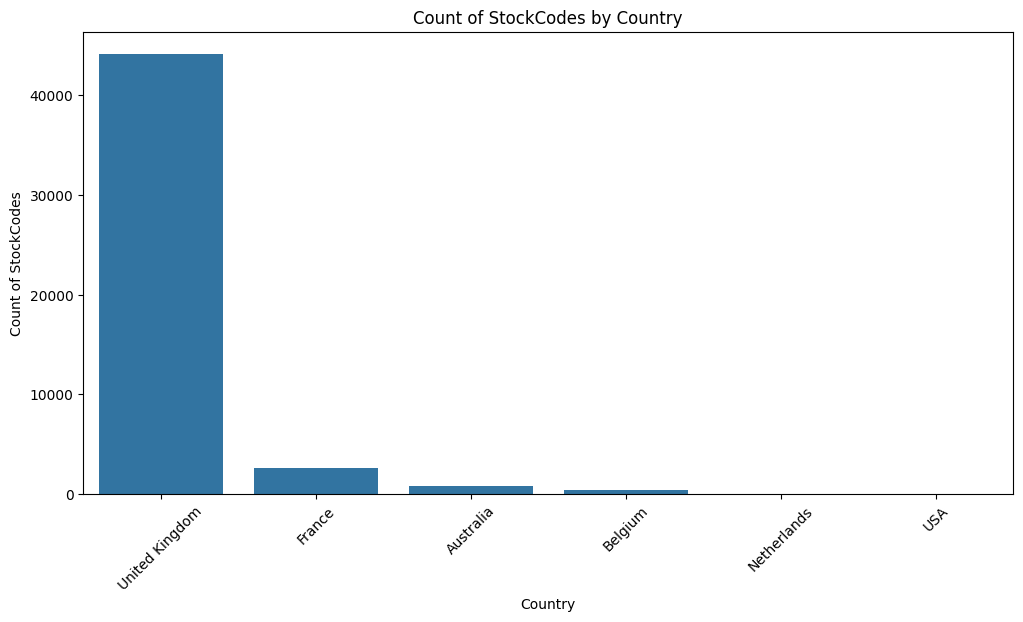

In [442]:
# Count plot for the number of StockCodes in each Country
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Country', order=df['Country'].value_counts().index)

# Adding labels and title
plt.xlabel('Country')
plt.ylabel('Count of StockCodes')
plt.title('Count of StockCodes by Country')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()

C:\Users\Arunk\AppData\Local\Temp\ipykernel_25544\1721236183.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Quantity', data=country_quantity, palette='viridis')


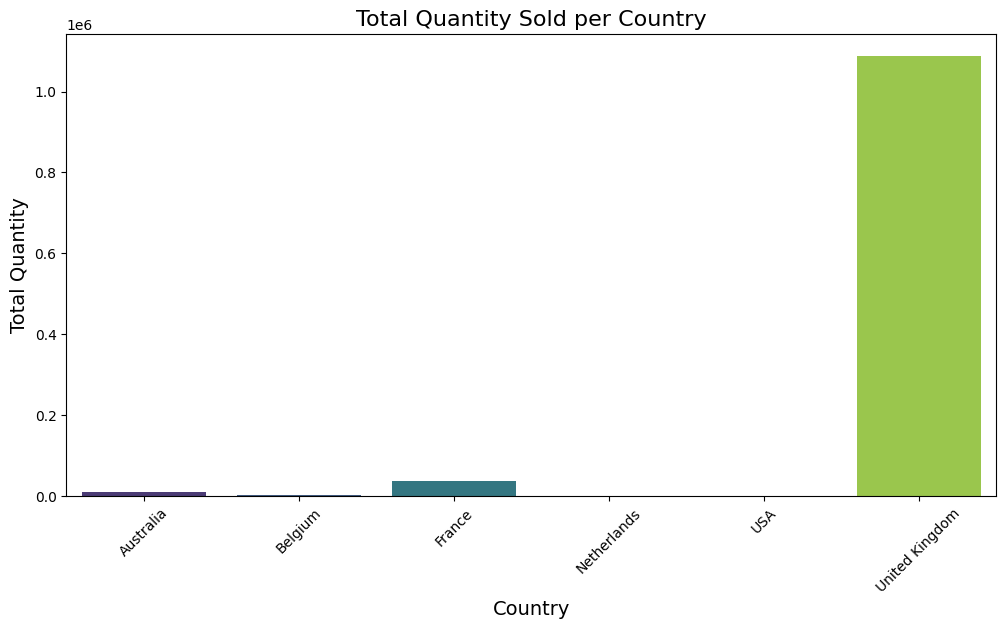

In [443]:

country_quantity = df.groupby('Country')['Quantity'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Quantity', data=country_quantity, palette='viridis')
plt.xticks(rotation=45)
plt.title('Total Quantity Sold per Country', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Total Quantity', fontsize=14)
plt.show()

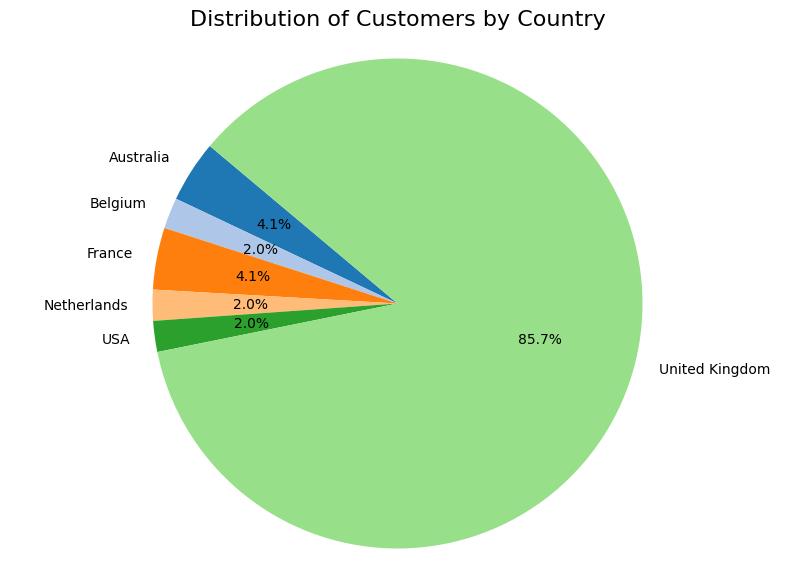

In [444]:
# Count the number of unique customers per country
country_customers = df.groupby('Country')['Customer ID'].nunique().reset_index()

# Create a pie chart
plt.figure(figsize=(10, 7))
plt.pie(country_customers['Customer ID'], labels=country_customers['Country'],
        autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Distribution of Customers by Country', fontsize=16)
plt.axis('equal')
plt.show()

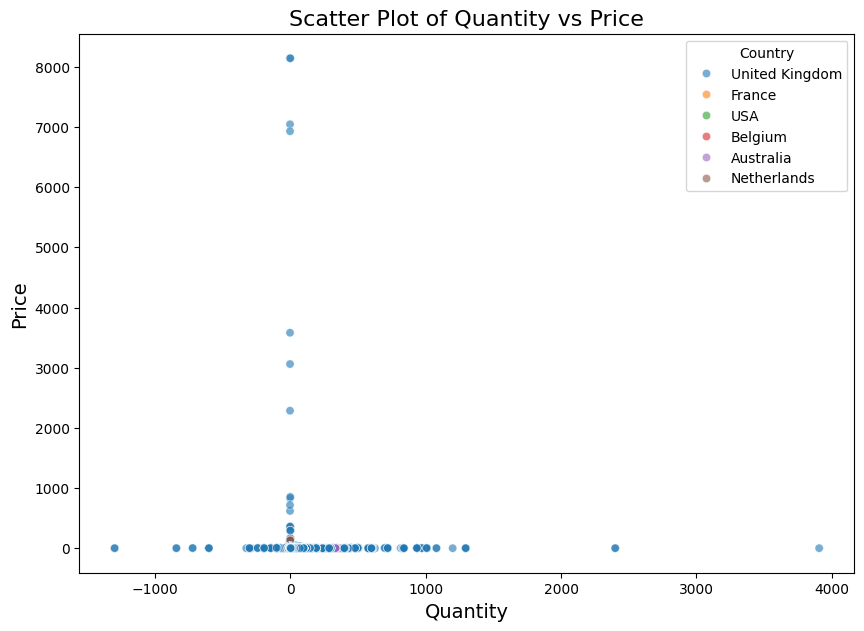

In [445]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Quantity', y='Price', data=df, hue='Country', alpha=0.6)
plt.title('Scatter Plot of Quantity vs Price', fontsize=16)
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

C:\Users\Arunk\AppData\Local\Temp\ipykernel_25544\1833420770.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Country', data=df, palette='rocket')


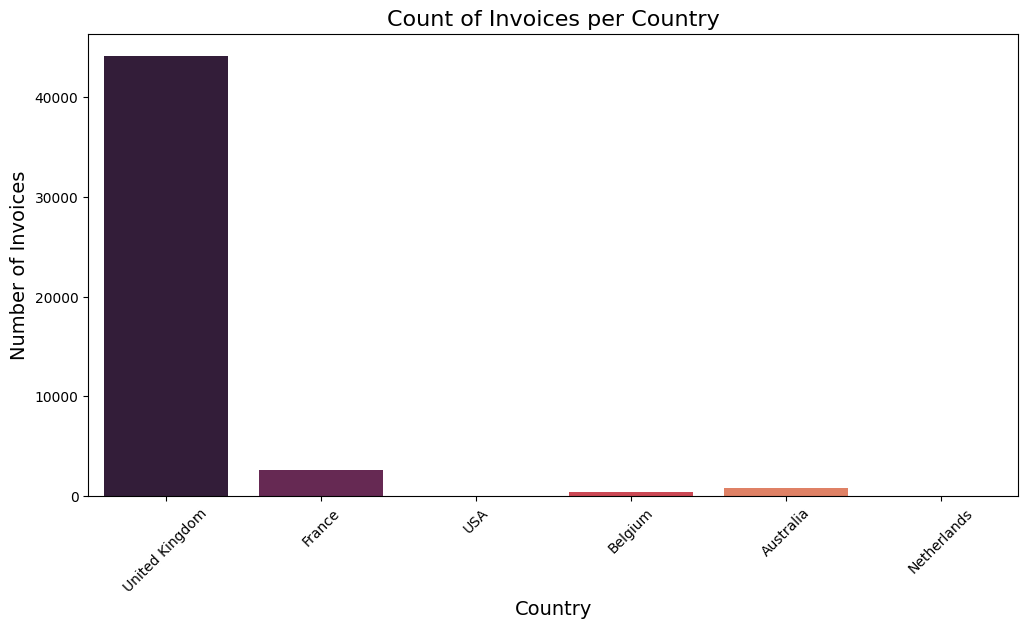

In [446]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Country', data=df, palette='rocket')
plt.title('Count of Invoices per Country', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Invoices', fontsize=14)
plt.xticks(rotation=45)
plt.show()


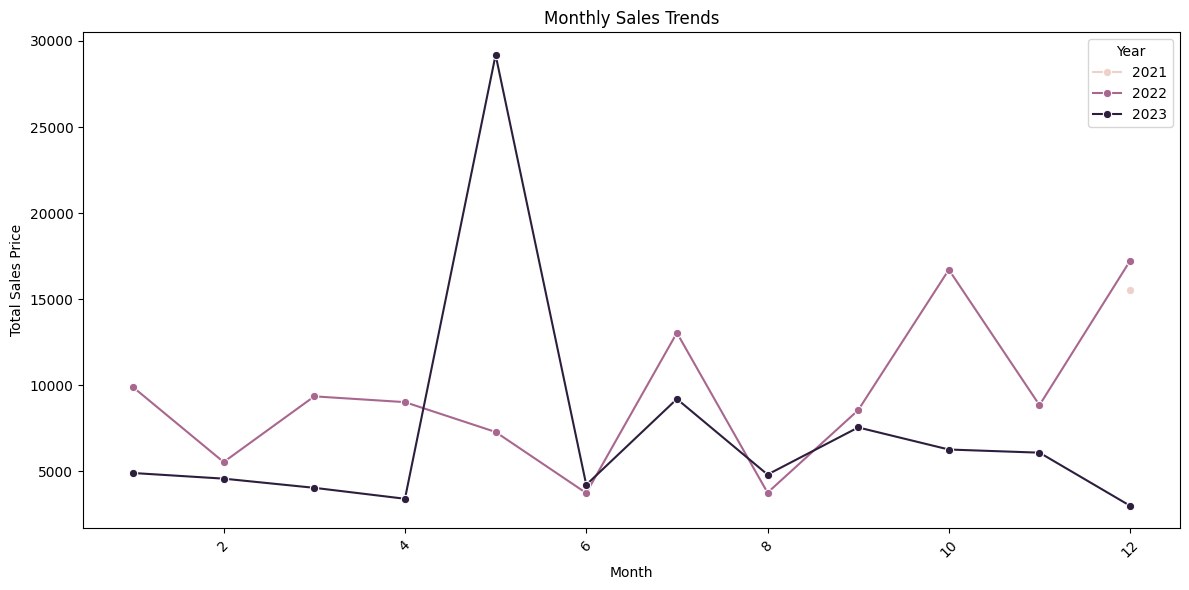

In [447]:
#  Line Plot for Monthly Sales Trends
monthly_sales = df.groupby(['Year', 'Month'])['Price'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Price', hue='Year', marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales Price')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.tight_layout()
plt.show()

Top 10 Products by Quantity Sold

C:\Users\Arunk\AppData\Local\Temp\ipykernel_25544\186553747.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='StockCode', y='TotalQuantitySold', data=top_10_products_by_quantity, palette='viridis')


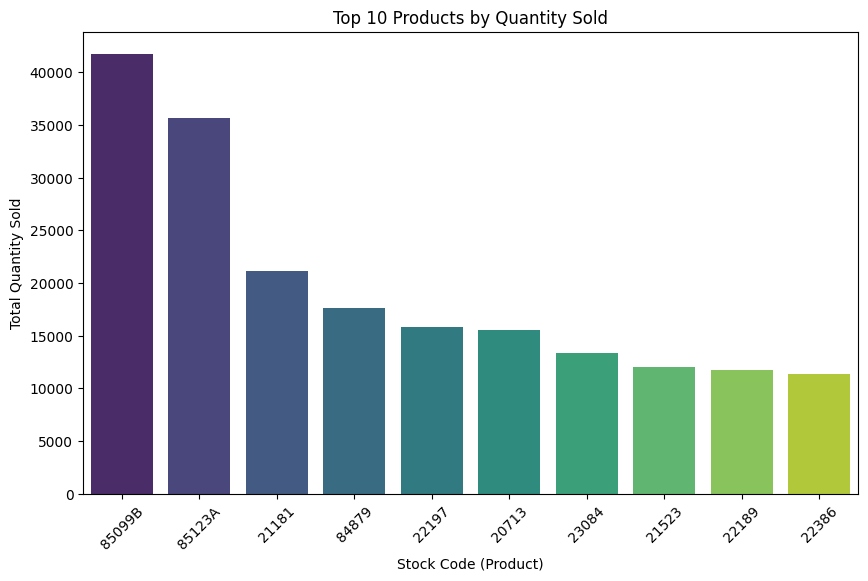

In [448]:
# 2. Group by StockCode (product) and sum Quantity
product_quantity = df.groupby('StockCode')['Quantity'].sum().reset_index()
product_quantity.columns = ['StockCode', 'TotalQuantitySold']

# 3. Sort the data to get the top 10 products by quantity sold
top_10_products_by_quantity = product_quantity.sort_values(by='TotalQuantitySold', ascending=False).head(10)

# 4. Visualize the top 10 products
plt.figure(figsize=(10, 6))
sns.barplot(x='StockCode', y='TotalQuantitySold', data=top_10_products_by_quantity, palette='viridis')
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Stock Code (Product)')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

* "This plot shows the top 10 products by quantity sold, which is useful for understanding product demand. By analyzing this plot, we can predict the quantity sold for a particular product, helping us gauge its demand effectively."

* "Based on this plot, the product '85099B' has a  high quantity sold. At the next level, products '85123A' and '21181' also show considerable demand."

Top 10 Products by Revenue

C:\Users\Arunk\AppData\Local\Temp\ipykernel_25544\1282015838.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='StockCode', y='TotalRevenue', data=top_10_high_revenue_products, palette='coolwarm')


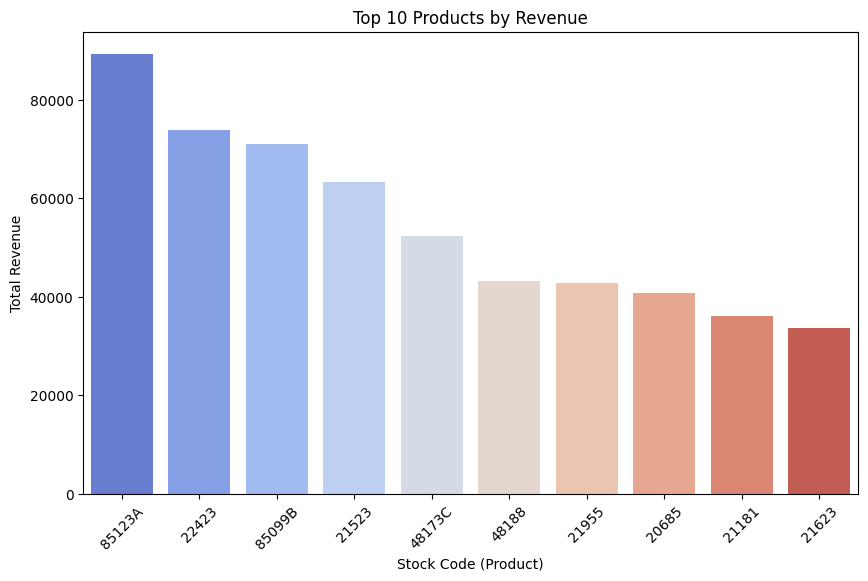

In [449]:
# 2. Calculate the Revenue for each transaction
df['Revenue'] = df['Quantity'] * df['Price']

# 3. Group by StockCode (product) and sum the Revenue
product_revenue = df.groupby('StockCode')['Revenue'].sum().reset_index()
product_revenue.columns = ['StockCode', 'TotalRevenue']

# 4. Sort the data to get the top 10 high-revenue products
top_10_high_revenue_products = product_revenue.sort_values(by='TotalRevenue', ascending=False).head(10)

# 5. Visualize the top 10 products by revenue
plt.figure(figsize=(10, 6))
sns.barplot(x='StockCode', y='TotalRevenue', data=top_10_high_revenue_products, palette='coolwarm')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Stock Code (Product)')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

* "This plot is useful for predicting the demand based on the revenue values of the top 10 products. It can help in estimating the demand for a particular product."

* "The product '85123A' has high sales volume and provides significant profit. This indicates that people have a strong preference for this product, and its usage is likely high as well."

* "Next in line, the products '22423' and '85099B' also show substantial income generation."

In [450]:
df.head(5)

,Customer ID,Country,Invoice,StockCode,Quantity,Price,Description,Day,Month,Year,Revenue
0,13085,United Kingdom,489434,85048,12,6.95,15CM CHRISTMAS GLASS BALL 20 LIGHTS,1,12,2021,83.4
1,13085,United Kingdom,489434,79323P,12,6.75,PINK CHERRY LIGHTS,1,12,2021,81.0
2,13085,United Kingdom,489434,79323P,12,6.75,"Unsaleable, destroyed.",1,12,2021,81.0
4,13085,United Kingdom,489434,79323W,12,6.75,WHITE CHERRY LIGHTS,1,12,2021,81.0
5,13085,United Kingdom,489434,79323W,12,6.75,"Unsaleable, destroyed.",1,12,2021,81.0


BOXPLOT

Before IQR Process

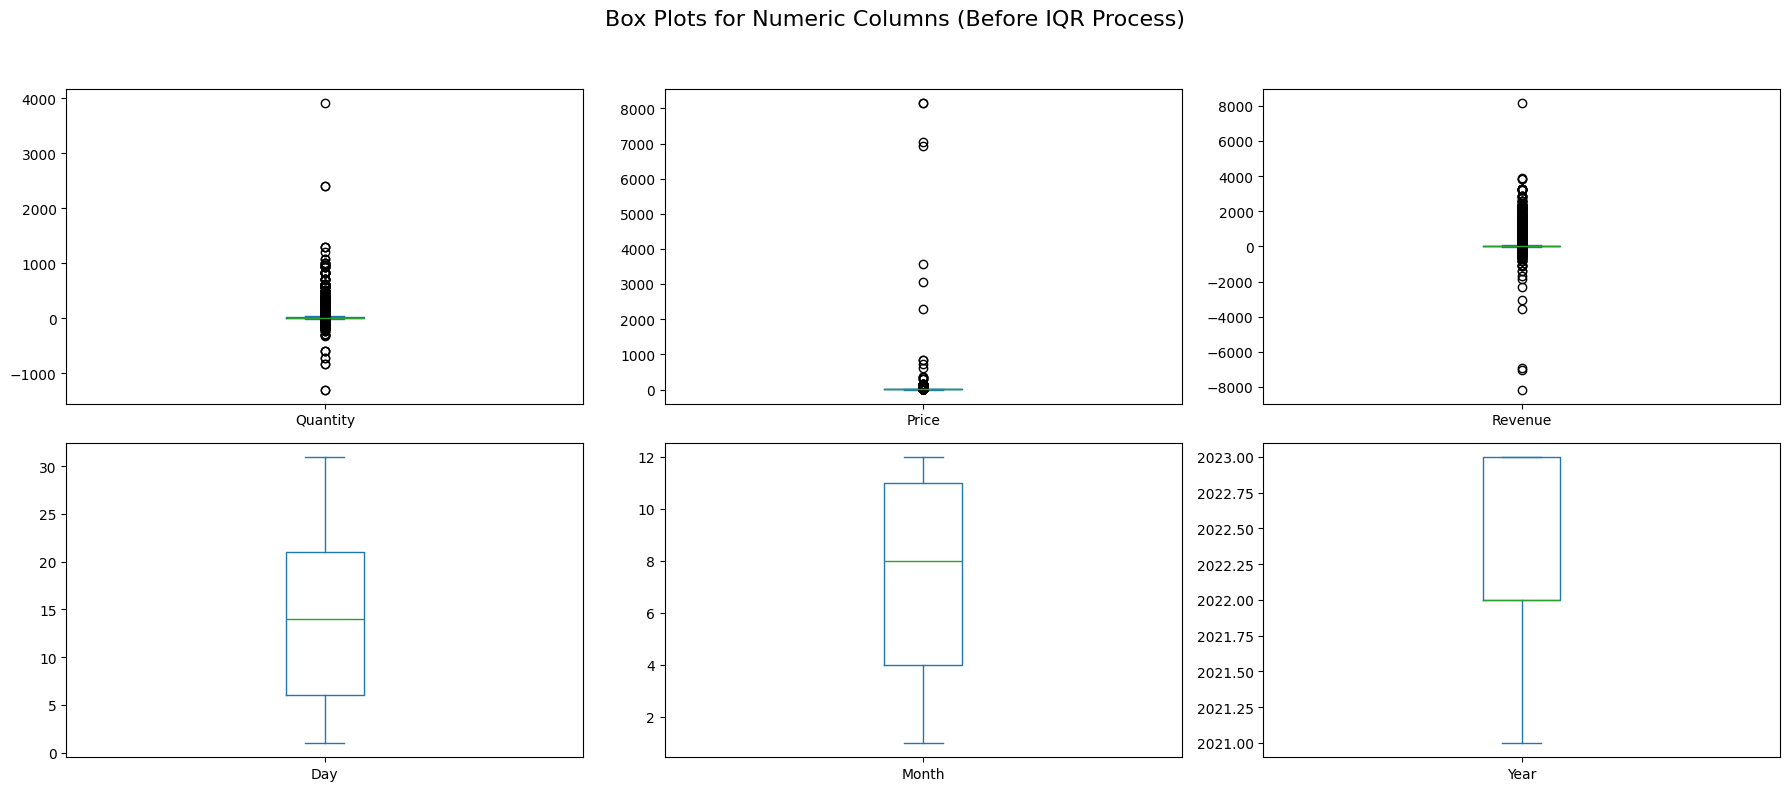

In [451]:
# Create a new DataFrame for EDA purposes
data_eda = df[['Quantity', 'Price', 'Revenue', 'Day', 'Month', 'Year']]  # Add more columns as needed

# Create box plots for the numeric columns in subplots
data_eda.plot(kind='box', subplots=True, layout=(4, 3), figsize=(18, 15), sharex=False, sharey=False)

# Show the plots
plt.suptitle('Box Plots for Numeric Columns (Before IQR Process)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the title
plt.show()

IQR Process

In [452]:
# Function to remove outliers using IQR
def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)  # First quartile (25th percentile)
    Q3 = data.quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1             # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)]

# List of columns to apply IQR process
columns_to_process = ['Quantity', 'Price', 'Revenue', 'Day', 'Month', 'Year']

# Create a copy of the original DataFrame for comparison
df_cleaned = df.copy()

After IQR Process

<Figure size 2000x1200 with 0 Axes>

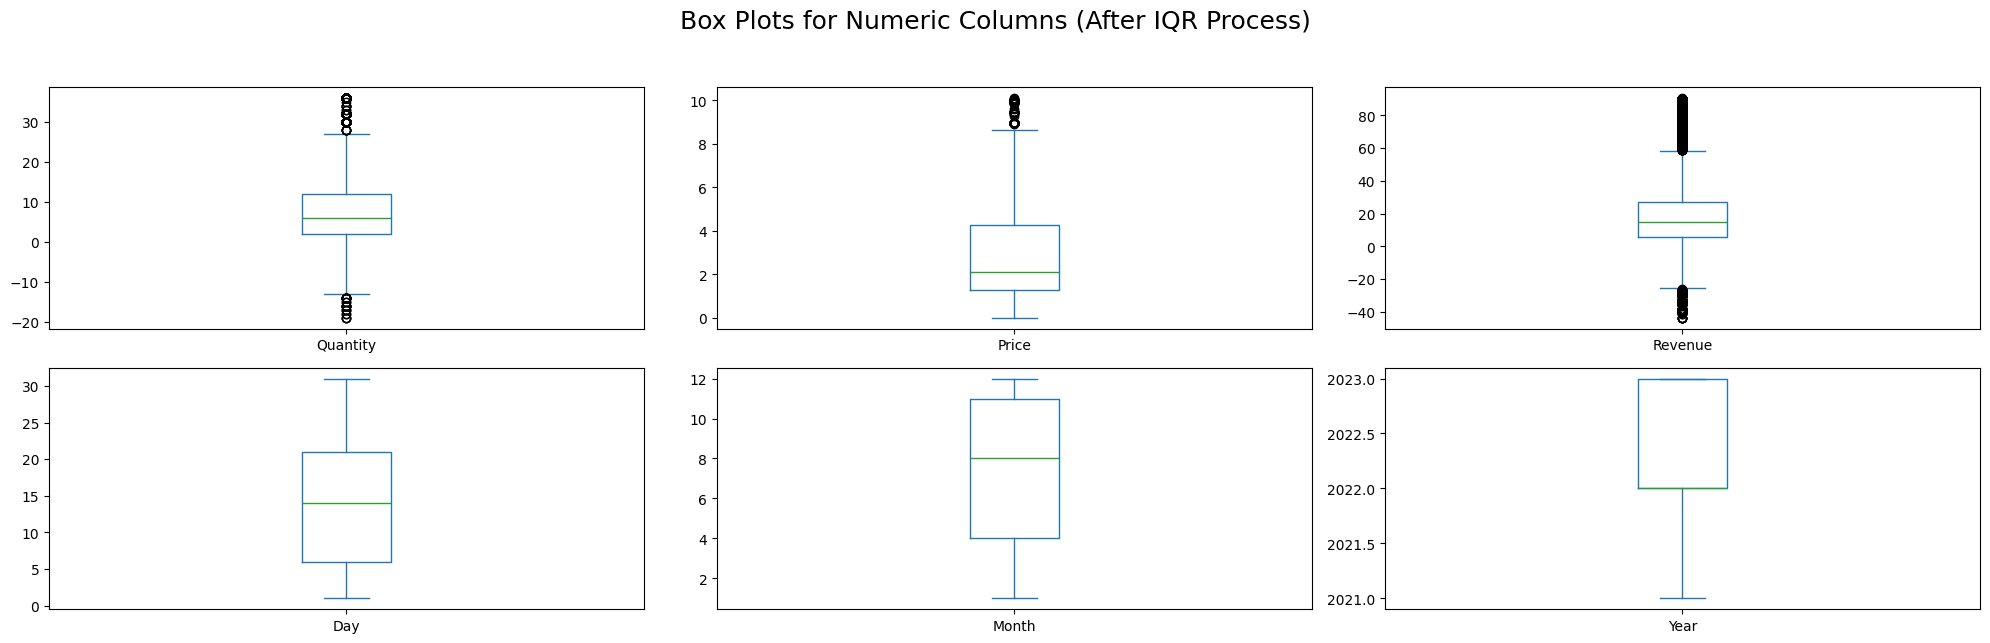

Outliers removed in Quantity: 0
Outliers removed in Price: 0
Outliers removed in Revenue: 0
Outliers removed in Day: 0
Outliers removed in Month: 0
Outliers removed in Year: 0


In [453]:
# Apply the IQR process to each specified column
for col in columns_to_process:
    df_cleaned[col] = remove_outliers_iqr(df_cleaned[col])

# Create a new DataFrame for EDA purposes after removing outliers
data_eda_after = df_cleaned[columns_to_process]

# Create box plots for the numeric columns in subplots after IQR process
plt.figure(figsize=(20, 12))  # Increased figure size for better visibility
data_eda_after.plot(kind='box', subplots=True, layout=(4, 3), figsize=(20, 12), sharex=False, sharey=False)

# Show the plots
plt.suptitle('Box Plots for Numeric Columns (After IQR Process)', fontsize=18)  # Increased title size
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the title
plt.show()

# Print out the number of outliers removed for each column
for column in columns_to_process:
    original_count = df[column].shape[0]
    cleaned_count = df_cleaned[column].shape[0]
    print(f"Outliers removed in {column}: {original_count - cleaned_count}")

* "By using a box plot,  were able to detect outliers and subsequently remove them, which helps in avoiding unwanted data."

ENCODING

In [454]:
#Finding the Unique Values:
country = df['Country'].unique()
Invoice = df['Invoice'].unique()
Stock = df['StockCode'].unique()
print(country)
print(Invoice)
print(Stock)

['United Kingdom' 'France' 'USA' 'Belgium' 'Australia' 'Netherlands']
['489434' '489435' '490068' ... '579089' '580119' '580672']
['85048' '79323P' '79323W' ... '22446' '22400' '21944']


In [455]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Assuming df is your DataFrame
df['Country'] = le.fit_transform(df['Country'])
df['Invoice'] = le.fit_transform(df['Invoice'])
df['StockCode'] = le.fit_transform(df['StockCode'])

In [456]:
# Save the modified DataFrame to a Pickle file
output_file_path = 'encoded_data.pkl'  # Specify your desired output file path
df.to_pickle(output_file_path)

print(f"DataFrame saved to {output_file_path}")

DataFrame saved to encoded_data.pkl


In [457]:
df.dtypes

Customer ID      int64
Country          int64
Invoice          int64
StockCode        int64
Quantity         int64
Price          float64
Description     object
Day              int64
Month            int64
Year             int64
Revenue        float64
dtype: object

* "Using label encoding, converted the categorical data in the form of letters into numeric values, making it suitable for use in machine learning models."

MEACHIN LEARNING

DecisionTreeRegressor

In [458]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
import pickle

# Selecting features and target
X = df[['Country', 'StockCode', 'Quantity', 'Price', 'Day', 'Month', 'Year']]
y = df['Revenue']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ensure y_train and y_test are 1-dimensional
y_train = y_train.values.ravel()  
y_test = y_test.values.ravel()

# Create an instance of the Decision Tree Regressor
dt_model = DecisionTreeRegressor()

# Train the Decision Tree model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
dt_preds = dt_model.predict(X_test)

# Evaluate the Decision Tree model
dt_mse = mean_squared_error(y_test, dt_preds)
dt_mae = mean_absolute_error(y_test, dt_preds)
dt_r2 = r2_score(y_test, dt_preds)

# Calculate RMSE
dt_rmse = np.sqrt(dt_mse)

# Print the evaluation results
print(f"Decision Tree Regressor - MSE: {dt_mse:.4f}")
print(f"Decision Tree Regressor - MAE: {dt_mae:.4f}")
print(f"Decision Tree Regressor - RMSE: {dt_rmse:.4f}")
print(f"Decision Tree Regressor - R2: {dt_r2:.4f}")

# Save the Decision Tree model to a pickle file
dt_model_file_path = 'decision_tree_regressor.pkl'
with open(dt_model_file_path, 'wb') as file:
    pickle.dump(dt_model, file)
print(f'Decision Tree Regressor model saved as: {dt_model_file_path}')



Decision Tree Regressor - MSE: 1484.0587
Decision Tree Regressor - MAE: 1.5073
Decision Tree Regressor - RMSE: 38.5235
Decision Tree Regressor - R2: 0.9509
Decision Tree Regressor model saved as: decision_tree_regressor.pkl


RandomForestRegressor

In [459]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor  
import pickle

# Selecting features and target
X = df[['Country', 'StockCode', 'Quantity', 'Price', 'Day', 'Month', 'Year']]
y = df['Revenue']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ensure y_train and y_test are 1-dimensional
y_train = y_train.values.ravel()  
y_test = y_test.values.ravel()

# Create an instance of the Random Forest Regressor
rf_model = RandomForestRegressor() 

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_preds = rf_model.predict(X_test)

# Evaluate the Random Forest model
rf_mse = mean_squared_error(y_test, rf_preds)
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)

# Calculate RMSE
rf_rmse = np.sqrt(rf_mse)

# Print the evaluation results
print(f"Random Forest Regressor - MSE: {rf_mse:.4f}")
print(f"Random Forest Regressor - MAE: {rf_mae:.4f}")
print(f"Random Forest Regressor - RMSE: {rf_rmse:.4f}")
print(f"Random Forest Regressor - R2: {rf_r2:.4f}")

# Save the Random Forest model to a pickle file
rf_model_file_path = 'random_forest_regressor.pkl'  
with open(rf_model_file_path, 'wb') as file:
    pickle.dump(rf_model, file)
print(f'Random Forest Regressor model saved as: {rf_model_file_path}')


Random Forest Regressor - MSE: 1083.6465
Random Forest Regressor - MAE: 1.2770
Random Forest Regressor - RMSE: 32.9188
Random Forest Regressor - R2: 0.9641
Random Forest Regressor model saved as: random_forest_regressor.pkl


XGBRegressor

In [460]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor 
import pickle

# Selecting features and target
X = df[[ 'Country', 'StockCode', 'Quantity', 'Price', 'Day', 'Month', 'Year']]
y = df[ 'Revenue']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ensure y_train and y_test are 1-dimensional
y_train = y_train.values.ravel()  
y_test = y_test.values.ravel()

# Create an instance of the XGBoost Regressor
xgb_model = XGBRegressor()  

# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
xgb_preds = xgb_model.predict(X_test)

# Evaluate the XGBoost model
xgb_mse = mean_squared_error(y_test, xgb_preds)
xgb_mae = mean_absolute_error(y_test, xgb_preds)
xgb_r2 = r2_score(y_test, xgb_preds)

# Calculate RMSE
xgb_rmse = np.sqrt(xgb_mse)

# Print the evaluation results
print(f"XGBoost Regressor - MSE: {xgb_mse:.4f}")
print(f"XGBoost Regressor - MAE: {xgb_mae:.4f}")
print(f"XGBoost Regressor - RMSE: {xgb_rmse:.4f}")
print(f"XGBoost Regressor - R2: {xgb_r2:.4f}")

# Save the XGBoost model to a pickle file
xgb_model_file_path = 'xgboost_regressor.pkl'  
with open(xgb_model_file_path, 'wb') as file:
    pickle.dump(xgb_model, file)
print(f'XGBoost Regressor model saved as: {xgb_model_file_path}')


XGBoost Regressor - MSE: 1866.1807
XGBoost Regressor - MAE: 2.8294
XGBoost Regressor - RMSE: 43.1993
XGBoost Regressor - R2: 0.9383
XGBoost Regressor model saved as: xgboost_regressor.pkl


In [461]:
# Specify the CSV file name to save the DataFrame
csv_filename = "final_model.csv"
# Save the DataFrame to a CSV file
df.to_csv(csv_filename, index=False)  # index=False to avoid saving the index

print(f"DataFrame saved to {csv_filename}")

DataFrame saved to final_model.csv


* Finally,  use machine learning models, specifically the XGBoost, Decision Tree, and Random Forest algorithms.

* The models were trained and tested.

* The target variable is 'TotalSales,' while other columns were used as features for model testing.

* Among these, the XGBoost algorithm achieved an accuracy of 93%.

* The Decision Tree achieved an accuracy of 95%.

* The Random Forest also reached an accuracy of 96%.

* The tested models were saved as pickle files.

* Therefore, for the Streamlit process, we will use the Random Forest algorithm.